In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from keras.models import Sequential as SQ
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix

In [2]:
# data generator with augmentation and preprocessing

data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
# loading images from train

train_data = data_generator.flow_from_directory(
    'dataset/train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 2637 images belonging to 17 classes.


In [4]:
# loading images from test

val_data = val_generator.flow_from_directory(
    'dataset/val',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 748 images belonging to 17 classes.


In [5]:
# loading images from test

test_data = test_generator.flow_from_directory(
    'dataset/test',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

Found 393 images belonging to 17 classes.


In [6]:
# initiating the model

model = SQ()

# Define the model architecture

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

# --------------------------------------------

# model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
# model.add(LeakyReLU(alpha=0.1))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(PReLU())
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3)))
# model.add(LeakyReLU(alpha=0.1))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(PReLU())
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3)))
# model.add(LeakyReLU(alpha=0.1))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(PReLU())
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(128))
# model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.5))
# model.add(Dense(64))
# model.add(PReLU())
# model.add(Dropout(0.5))
# model.add(Dense(32))
# model.add(LeakyReLU(alpha=0.1))
# model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.01)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(PReLU())
model.add(Dropout(0.5))
model.add(Dense(32, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

# # create ResNet50 model
# resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(300, 300, 3))

# # freeze layers in ResNet50
# for layer in resnet.layers:
#     layer.trainable = False

# # create new model and add layers
# model = SQ()
# model.add(resnet)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

In [7]:
# reducing the overfitting with earlystopping and learning rate

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_delta=0.0001)

In [8]:
# intialising the opimizer for CNN and compile

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['Accuracy']) 

In [9]:
# from keras.applications import ResNet50
# from keras.models import Sequential
# from keras.layers import Dense

# # Instantiate ResNet50 with imagenet weights
# resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# # Freeze layers in ResNet50
# for layer in resnet.layers:
#     layer.trainable = False

# # Create a new sequential model
# model = Sequential()

# # Add the ResNet50 model to the new model
# model.add(resnet)

# # Add a flatten layer to the new model
# model.add(Flatten())

# # Add some dense layers to the new model
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='softmax'))

# # Compile the new model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


In [10]:
# Train the model
model_training = model.fit(train_data,
                           batch_size = 64,
                           epochs = 100, 
                           validation_data = val_data,
                           validation_steps = 748 //64,
                           callbacks=[es, rlr]
                          )

Epoch 1/100
83/83 [==============================] - 172s 2s/step - loss: 10.0213 - Accuracy: 0.0849 - val_loss: 9.3181 - val_Accuracy: 0.0341 - lr: 0.0010
Epoch 2/100
83/83 [==============================] - 182s 2s/step - loss: 8.6933 - Accuracy: 0.1509 - val_loss: 8.5896 - val_Accuracy: 0.0312 - lr: 0.0010
Epoch 3/100
83/83 [==============================] - 187s 2s/step - loss: 7.5622 - Accuracy: 0.2620 - val_loss: 7.8955 - val_Accuracy: 0.1051 - lr: 0.0010
Epoch 4/100
83/83 [==============================] - 186s 2s/step - loss: 6.3988 - Accuracy: 0.3785 - val_loss: 7.2214 - val_Accuracy: 0.1364 - lr: 0.0010
Epoch 5/100
83/83 [==============================] - 178s 2s/step - loss: 5.4733 - Accuracy: 0.4448 - val_loss: 7.4548 - val_Accuracy: 0.1080 - lr: 0.0010
Epoch 6/100
83/83 [==============================] - 166s 2s/step - loss: 4.6560 - Accuracy: 0.4915 - val_loss: 7.3120 - val_Accuracy: 0.1051 - lr: 0.0010
Epoch 7/100
83/83 [==============================] - 166s 2s/step - l

In [11]:
# Writing the trained CNN model to a json file
Sign_json_file = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(Sign_json_file)
weights = model.get_weights()
np.save('model_weights.npy', weights)
model.save_weights('CNN_model.h5')

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [12]:
# Evaluate the model with the test accuracy
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

13/13 [==============================] - 10s 782ms/step - loss: 0.3697 - Accuracy: 0.9567
Test accuracy: 0.9567430019378662


In [13]:
# getting the validation loss and validation accuracy of model

val_score = model.evaluate(val_data, verbose=0)
print('Validation loss:', val_score[0])
print('Validation accuracy:', val_score[1])

Validation loss: 0.37359288334846497
Validation accuracy: 0.9478609561920166


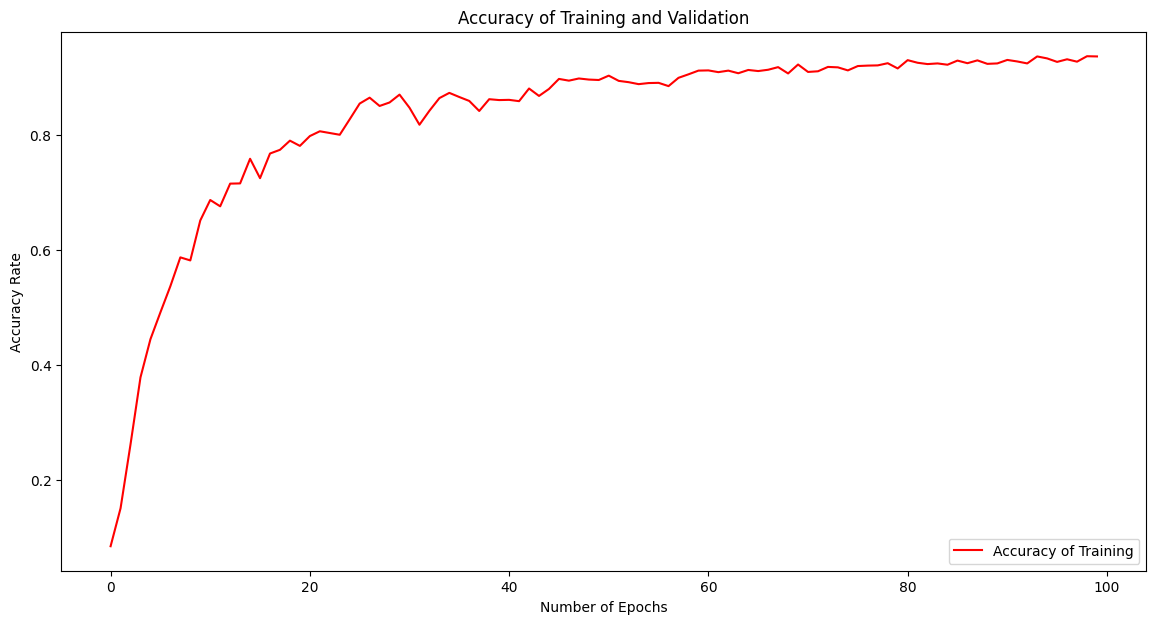

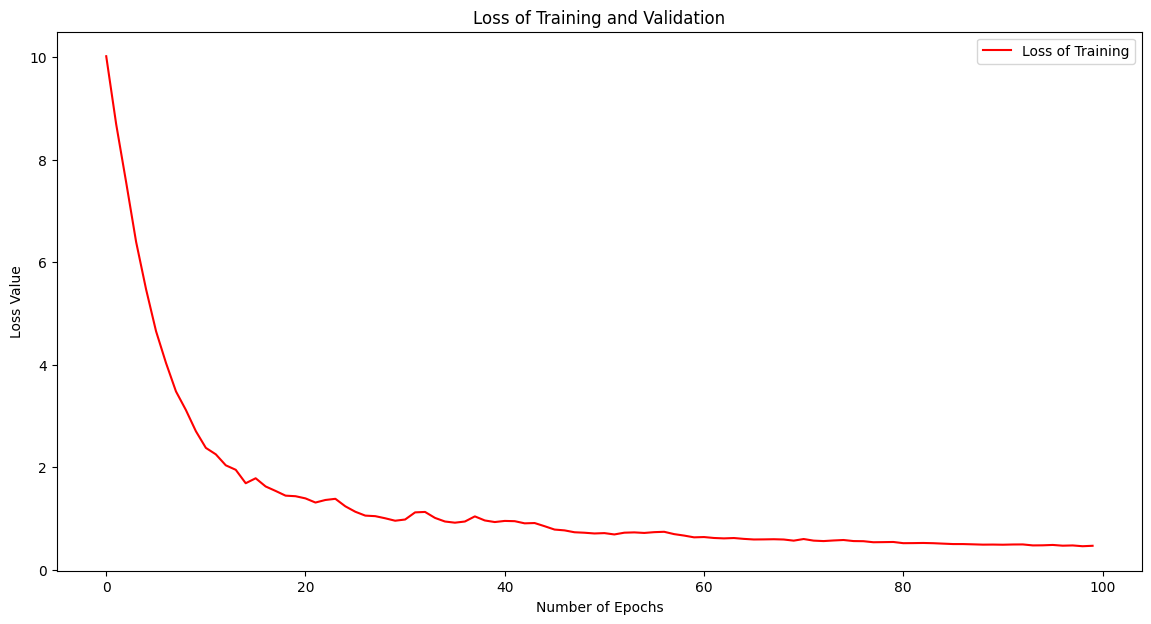

In [14]:
# plotting the training and validation accuracy

accuracy = model_training.history['Accuracy']
# val_acc = model_training.history['val_accuracy']
loss = model_training.history['loss']
# val_loss = model_training.history['val_loss']

epochs = range(len(accuracy))

figure = plt.figure(figsize=(14, 7))

# Plotting accuracy
plt.plot(epochs, accuracy, 'r', label='Accuracy of Training')
# plt.plot(epochs, val_acc, 'b', label='Accuracy of Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy of Training and Validation')
plt.legend(loc='lower right')

plt.figure(figsize=(14, 7))

# Plotting loss
plt.plot(epochs, loss, 'r', label='Loss of Training')
# plt.plot(epochs, val_loss, 'b', label='Loss of Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.title('Loss of Training and Validation')
plt.legend(loc='upper right')

plt.show()


13/13 [==============================] - 9s 644ms/step


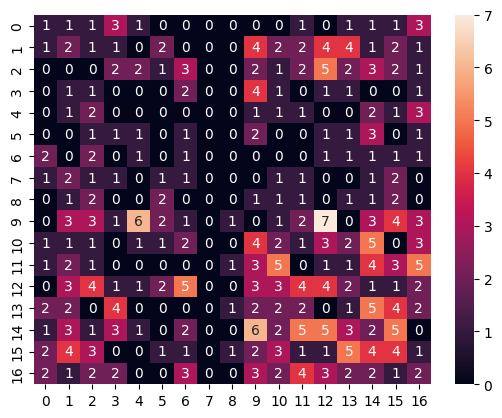

[[1 1 1 3 1 0 0 0 0 0 0 1 0 1 1 1 3]
 [1 2 1 1 0 2 0 0 0 4 2 2 4 4 1 2 1]
 [0 0 0 2 2 1 3 0 0 2 1 2 5 2 3 2 1]
 [0 1 1 0 0 0 2 0 0 4 1 0 1 1 0 0 1]
 [0 1 2 0 0 0 0 0 0 1 1 1 0 0 2 1 3]
 [0 0 1 1 1 0 1 0 0 2 0 0 1 1 3 0 1]
 [2 0 2 0 1 0 1 0 0 0 0 0 1 1 1 1 1]
 [1 2 1 1 0 1 1 0 0 0 1 1 0 0 1 2 0]
 [0 1 2 0 0 2 0 0 0 1 1 1 0 1 1 2 0]
 [0 3 3 1 6 2 1 0 1 0 1 2 7 0 3 4 3]
 [1 1 1 0 1 1 2 0 0 4 2 1 3 2 5 0 3]
 [1 2 1 0 0 0 0 0 1 3 5 0 1 1 4 3 5]
 [0 3 4 1 1 2 5 0 0 3 3 4 4 2 1 1 2]
 [2 2 0 4 0 0 0 0 1 2 2 2 0 1 5 4 2]
 [1 3 1 3 1 0 2 0 0 6 2 5 5 3 2 5 0]
 [2 4 3 0 0 1 1 0 1 2 3 1 1 5 4 4 1]
 [2 1 2 2 0 0 3 0 0 3 2 4 3 2 2 1 2]]


In [15]:
# confusion matrix

# Get predictions on test data
y_pred_prob = model.predict(test_data)

# Convert the predictions to class labels
test_pred_classes = np.argmax(y_pred_prob, axis = 1)

# Get the true class labels of the test images
true_classes = test_data.classes.flatten()

# Generate confusion matrix
cm = confusion_matrix(true_classes, test_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()
print (cm)

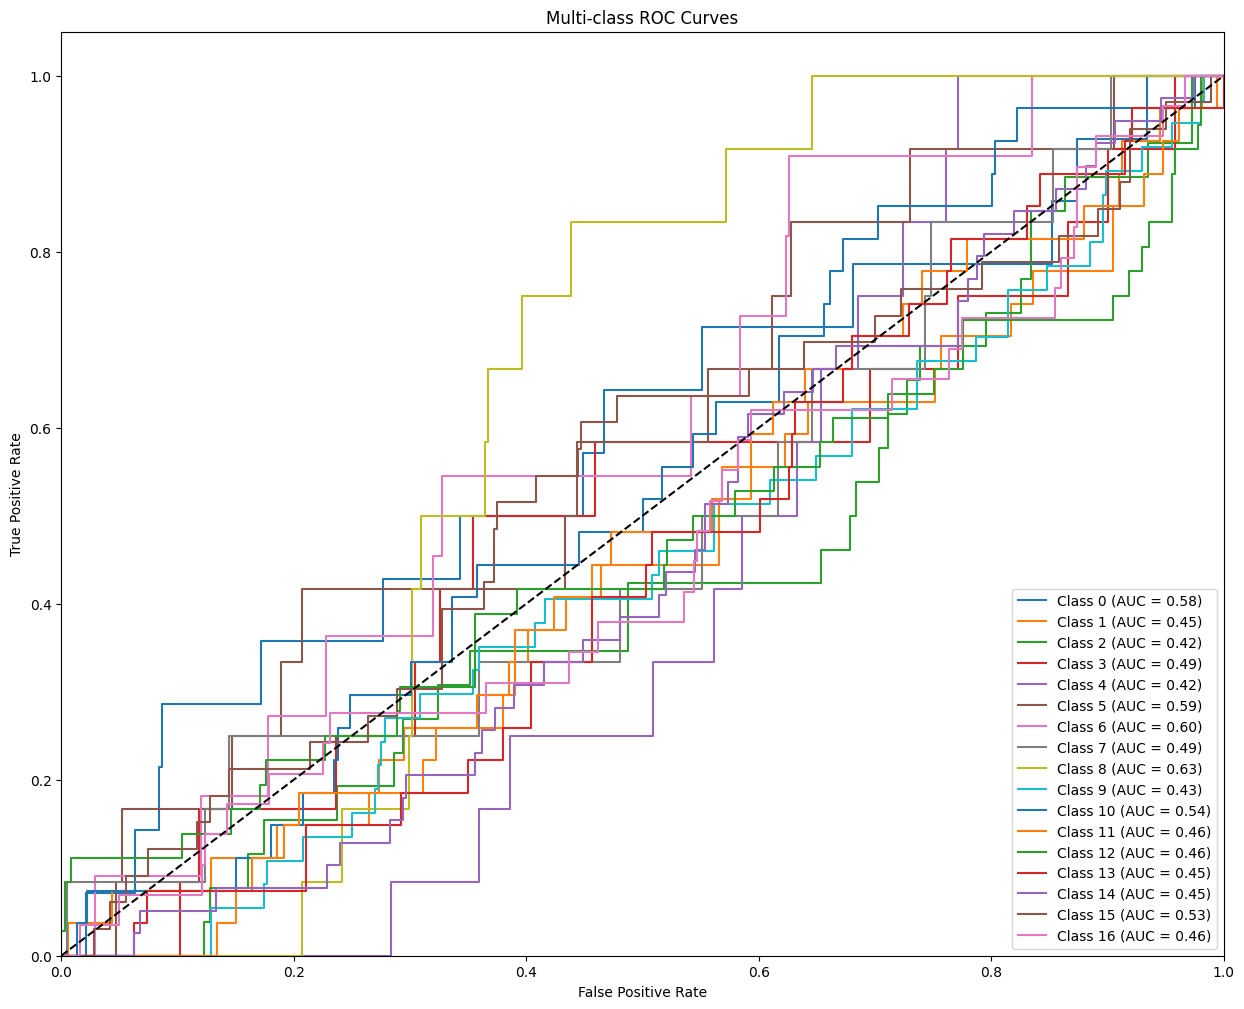

In [16]:
# stating the number of classes
n_classes = 17

# initializing the arrays
fpr = {}
tpr = {}
roc_auc = {}

# looping through number of classes and saving them to arrays
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes == i, y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(true_classes == i, y_pred_prob[:, i])

# Plot the ROC curves
fig, ax = plt.subplots(figsize=(15, 12))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Multi-class ROC Curves')
ax.legend(loc="lower right")
plt.show()

In [17]:
# classification report

# initializing the classes
class_labels = {0: "ayubowan", 1: "fifty_2", 2: "fifty_3", 3: "good(hodai)", 4: "his", 5: "house", 6: "i_love_you", 7: "naraka", 8: "oba", 
                9: "ten_3", 10: "thirty_2", 11: "thirty_3", 12: "twenty_2", 13: "twenty_3", 14: "two", 15: "when_1", 16: "when_2"}

class_label = [ 'ayubowan', 'fifty_2','fifty_3', 'good(hodai)', 'his', 'house', 'i_love_you', 'naraka', 'oba', 'ten_3', 'thirty_2', 'thirty_3', 'twenty_2', 'twenty_3',
              'two', 'when_1', 'when_2']

y_true = []
y_pred = []

# Loop through the batches in the test set generator
for i in range(len(test_data)):
    # Get the batch of test data
    test_images, test_labels = next(test_data)
    # Make predictions on the batch
    batch_pred = model.predict(test_images)
    # Append the true labels and predicted labels to the respective lists
    y_true.append(np.argmax(test_labels, axis=1)) # convert to label-encoded format
    y_pred.append(batch_pred)

# Concatenate the true labels and predicted labels for all batches
y_true = np.concatenate(y_true, axis=0)
y_pred = np.concatenate(y_pred, axis=0)

# Generate the classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_label)
print(report)

1/1 [==============================] - 0s 229ms/step
              precision    recall  f1-score   support

    ayubowan       1.00      1.00      1.00        14
     fifty_2       1.00      1.00      1.00        27
     fifty_3       1.00      1.00      1.00        26
 good(hodai)       0.60      1.00      0.75        12
         his       0.92      1.00      0.96        12
       house       1.00      1.00      1.00        12
  i_love_you       0.55      1.00      0.71        11
      naraka       1.00      0.17      0.29        12
         oba       1.00      0.33      0.50        12
       ten_3       1.00      1.00      1.00        37
    thirty_2       1.00      1.00      1.00        27
    thirty_3       1.00      1.00      1.00        27
    twenty_2       1.00      1.00      1.00        36
    twenty_3       1.00      1.00      1.00        27
         two       1.00      1.00      1.00        39
      when_1       1.00      1.00      1.00        33
      when_2       1.00     